<a href="https://colab.research.google.com/github/mkarasu2005/CS19P18-DL-220701517/blob/main/Ex3_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 92ms/step - accuracy: 0.3056 - loss: 1.8674 - val_accuracy: 0.4734 - val_loss: 1.4737
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.5310 - loss: 1.3023 - val_accuracy: 0.5616 - val_loss: 1.2394
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.5929 - loss: 1.1501 - val_accuracy: 0.6116 - val_loss: 1.1008
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 98ms/step - accuracy: 0.6318 - loss: 1.0457 - val_accuracy: 0.6378 - val_loss: 1.0334
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 89ms/step - accuracy: 0.6658 - loss: 0.9556 - val_accuracy: 0.6334 - val_loss: 1.0373
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 89ms/step - accuracy: 0.6804 - loss: 0.8984 - val_accuracy: 0.6619 - val_loss: 0.9643
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 90ms/step - accuracy: 0.7037 - loss: 0.8410 - val_accuracy: 0.6724 - val_loss: 0.9416
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.7243 - loss: 0.7872 - 

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
index = int(input("Enter an index (0 to 9999) for test image: "))
if index < 0 or index >= len(x_test):
    print("Invalid index. Using index 0 by default.")
    index = 0

Enter an index (0 to 9999) for test image: 3


In [10]:
test_image = x_test[index]
true_label = np.argmax(y_test[index])

In [11]:
prediction = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


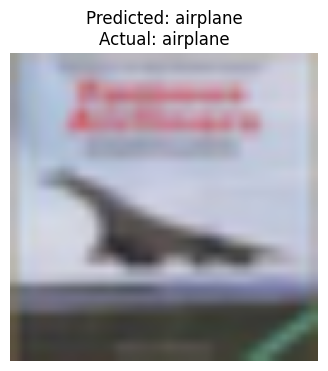

In [12]:
plt.figure(figsize=(4, 4))
resized_image = tf.image.resize(test_image, [128, 128])
plt.imshow(resized_image)
plt.axis('off')
plt.title(f"Predicted: {class_names[predicted_label]}\nActual: {class_names[true_label]}")
plt.show()